# Cubic Spline Interpolation with Python Module

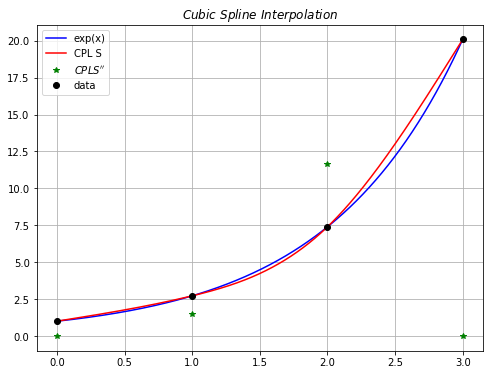

In [20]:
import numpy as np
from math import exp
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

x0 = [0, 1, 2, 3]; y0 = [exp(num) for num in x0]

#Make a function with CubicSpline with bc_type = natural
S = CubicSpline(x0, y0, bc_type = 'natural')

x = np.linspace(0, 3, 1000)
plt.figure(figsize = (8, 6))
plt.plot(x, np.exp(x), 'b', label = 'exp(x)')
plt.plot(x, S(x, 0), 'r', label = 'CPL S')
plt.plot(x0, S(x0, 2), 'g*', label = r'$CPL S^{\prime\prime}$')
plt.plot(x0, y0, 'ko', label = 'data')
plt.title(r'$Cubic\ Spline\ Interpolation$')
plt.legend()
plt.grid()
plt.show()

<h1>Cubic Spline Interpolation</h1>
<h3><em>Cubic spline interpolant:</em></h3>
<ul><li>$S_j(x)=a_j+b_j(x-x_j)+c_j(x-x_j)^2+d_j(x-x_j)^3;\ \ for \ j=0,1, \dots,n-1$</li></ul>
<h3><em>Relation of coefficients:</em></h3>
<ul><li>(1) $d_j = \frac{1}{3h_j}[c_{j+1}-c_j]$</li>
    <li>(2) $b_j = \frac{1}{h_j}(a_{j+1}-a_j)-\frac{h_j}{3}(2c_j+c_{j+1})$</li>
    <li>(3) $h_{j-1}c_{j-1} + 2(h_{j-1}+h_j) \ c_j + h_jc_{j+1} = \frac{3}{h_j}(a_{j+1}-a_j)-\frac{3}{h_{j-1}}(a_j-a_{j-1});\ \ [Interval\ h:\ h_j = x_{j+1}-x_j]$</li>
</ul>

<h1>Numerical Analysis - BC Natural Splines</h1>
<table align='center'> 
<tr> 
<td><img src='./Natural_Spline_1.png' width='450' height='200'/></td> 
<td><img src='./Natural_Spline_2.png' width='450' height='200'/></td> 
</tr> 
</table>

<h2>(1)Plot A diagram</h2>

In [54]:
import numpy as np
from math import exp
from numpy.linalg import inv

#Set up given grid points
x0 = np.array([0, 1, 2, 3])
a = np.array([exp(x0[i]) for i in range(len(x0))])
h = np.array([x0[i+1]-x0[i] for i in range(len(x0)-1)])

# Matrix to solve C_j
A = np.zeros((len(x0),len(x0))); A[0][0] = 1; A[-1][-1] = 1

for i in range(1, len(x0)-1):
    A[i][i-1] = (h[i-1])
    A[i][i+0] = (h[i-1]+h[i]) * 2
    A[i][i+1] = (h[i])

# CA = g, since g,C are both row vectors
g = np.zeros(len(a))
for i in range(0,len(g)-2):
    g[i+1] = (3/h[i+1])*(a[i+2]-a[i+1]) - (3/h[i])*(a[i+1]-a[i])

# Multiply inverse of A to get C and Set BC=natural
c = np.matmul(g, inv(A)); c[0] = 0; c[-1] = 0

# Use relation of coeff to get b, d
b = [(1/h[j]) * (a[j+1]-a[j]) - (h[j]/3) * (2*c[j]+c[j+1]) for j in range(0,len(c)-1)]
d = [(1/3/h[j]) * (c[j+1]-c[j]) for j in range(0,len(c)-1)]

#------------------------------------------------------------------------------------------
def CSL(x):
    
    # determine which section x sits on
    if x >= min(x0) and x <= max(x0):
        ind = int(np.argwhere(x>=x0)[-1])
        
        # if x sits on the right boundary, b and d are both out of range, correction is needed
        if ind == (len(x0)-1):
            ind = -1
        
        # return the interpolant's value on x-position
        return a[ind] + b[ind]*(x-x0[ind]) + c[ind]*(x-x0[ind])**2 + d[ind]*(x-x0[ind])**3
    
    # return NAN for x out of range
    else:
        print('Error: Out of range')
        return np.nan 
#------------------------------------------------------------------------------------------

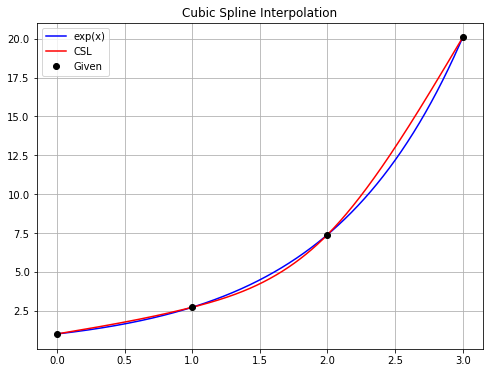

In [55]:
# vectorize CSL to plot
VCSL = np.vectorize(CSL)

import matplotlib.pyplot as plt

x = np.linspace(0, 3, 1000)
plt.figure(figsize = (8, 6))
plt.plot(x, np.exp(x), 'b', label = 'exp(x)')
plt.plot(x, VCSL(x), 'r', label = 'CSL')
plt.plot(x0, a, 'ko', label = 'Given')
plt.title('Cubic Spline Interpolation')
plt.legend()
plt.grid()
plt.show()

<h2>(2)Get Value of the point to interpolate</h2>

In [18]:
import numpy as np

def Cubic_Spline_Interpolation(x, x0, y0):

    a = y0
    h = np.array([x0[i+1]-x0[i] for i in range(len(x0)-1)])

    # CA = g, since g,C are both row vectors
    g = np.zeros(len(a))
    for i in range(len(g)-2):
        g[i+1] = (3/h[i+1]) * (a[i+2] - a[i+1]) - (3/h[i]) * (a[i+1] - a[i])

    # Solving tridiagonal linear system
    l, u, z = np.zeros(len(a)), np.zeros(len(a)), np.zeros(len(a))
    l[0], u[0], z[0] = 1, 0, 0
    for i in range(len(a)-2):
        l[i+1] = 2*(x0[i+2] - x0[i]) - (h[i] * u[i])
        u[i+1] = h[i+1] / l[i+1]
        z[i+1] = (g[i+1] - (h[i] * z[i])) / l[i+1]

    l[-1], z[-1] = 1, 0
    c = np.zeros(len(a)); c[-1] = 0
    b, d  = np.zeros(len(a)-1), np.zeros(len(a)-1)
    for i in range(len(a)-1):
        j = (len(a)-1) - i - 1
        c[j] = z[j] - u[j] * c[j+1]
        b[j] = ((a[j+1] - a[j]) / h[j]) - (h[j] * (c[j+1] + 2 * c[j]) / 3)
        d[j] = (c[j+1] - c[j]) / (3 * h[j])

    # determine which section x sits on
    if x >= min(x0) and x <= max(x0):
        ind = int(np.argwhere(x>=x0)[-1])
        
        # if x sits on the right boundary, b and d are both out of range, correction is needed
        if ind == (len(x0)-1):
            ind = -1
        
        # return the interpolant's value on x-position
        return a[ind] + b[ind]*(x-x0[ind]) + c[ind]*(x-x0[ind])**2 + d[ind]*(x-x0[ind])**3
    
    # return NAN for x out of range
    else:
        print('Error: Out of range')
        return np.nan

In [19]:
#Set up given grid points
x0 = np.array([0, 1, 2, 3])
a = np.array([exp(x0[i]) for i in range(len(x0))])
h = np.array([x0[i+1]-x0[i] for i in range(len(x0)-1)])

Cubic_Spline_Interpolation(2.5, x0=x0, y0=a)

13.008538166730931